In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

# Step 1 - Climate Analysis and Exploration

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
inspector = inspect(engine)

In [10]:
# Inspect Tables
# Station Table
stations = engine.execute("SELECT * FROM Station")

In [11]:
print(stations.keys())
# RMKeyView(['id', 'station', 'name', 'latitude', 'longitude', 'elevation'])

RMKeyView(['id', 'station', 'name', 'latitude', 'longitude', 'elevation'])


In [12]:
stations.fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [13]:
columns = inspector.get_columns("Station")

for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [14]:
# Measurement Table
measurements = engine.execute("SELECT * FROM Measurement LIMIT 15")

In [15]:
print(measurements.keys())
# RMKeyView(['id', 'station', 'date', 'prcp', 'tobs'])

RMKeyView(['id', 'station', 'date', 'prcp', 'tobs'])


In [16]:
measurements.fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0)]

In [17]:
columns = inspector.get_columns("Measurement")

for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Exploratory Precipitation Analysis

In [18]:
# Find the most recent date in the data set.
recent_date = (session.query(Measurement.date)
              .order_by(Measurement.date.desc())
              .first())

recent_date
# ('2017-08-23',)

('2017-08-23',)

In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days = 366)
print("Query Date:", year_ago)
# Query Date: 2016-08-22

Query Date: 2016-08-22


#### Max Precipitation Scores From Latest Date

In [20]:
# Perform a query to retrieve the data and precipitation scores
year_prcp = (session.query(Measurement.date, func.max(Measurement.prcp))
            .filter(func.strftime("%Y-%m-%d", Measurement.date) > year_ago)
            .group_by(Measurement.date)
            .all())
year_prcp

[('2016-08-23', 1.79),
 ('2016-08-24', 2.28),
 ('2016-08-25', 0.21),
 ('2016-08-26', 0.04),
 ('2016-08-27', 0.18),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.05),
 ('2016-08-31', 2.46),
 ('2016-09-01', 0.02),
 ('2016-09-02', 0.19),
 ('2016-09-03', 1.0),
 ('2016-09-04', 0.74),
 ('2016-09-05', 0.18),
 ('2016-09-06', 1.0),
 ('2016-09-07', 1.35),
 ('2016-09-08', 0.22),
 ('2016-09-09', 0.35),
 ('2016-09-10', 1.16),
 ('2016-09-11', 0.6),
 ('2016-09-12', 1.04),
 ('2016-09-13', 1.2),
 ('2016-09-14', 6.7),
 ('2016-09-15', 3.35),
 ('2016-09-16', 0.61),
 ('2016-09-17', 0.36),
 ('2016-09-18', 0.42),
 ('2016-09-19', 0.25),
 ('2016-09-20', 0.43),
 ('2016-09-21', 1.02),
 ('2016-09-22', 0.75),
 ('2016-09-23', 0.94),
 ('2016-09-24', 0.27),
 ('2016-09-25', 0.04),
 ('2016-09-26', 1.02),
 ('2016-09-27', 1.0),
 ('2016-09-28', 0.08),
 ('2016-09-29', 1.49),
 ('2016-09-30', 0.38),
 ('2016-10-01', 1.02),
 ('2016-10-02', 0.61),
 ('2016-10-03', 0.46),
 ('2016-10-04', 3.46),
 ('2016-10-05', 0.

In [21]:
# Save the query results as a Pandas DataFrame and set the index to the date column
year_prcp_df = pd.DataFrame(year_prcp, columns = ["date", "prcp"])
year_prcp_df.set_index("date", inplace = True)
year_prcp_df.head(10)

,prcp
date,
2016-08-23,1.79
2016-08-24,2.28
2016-08-25,0.21
2016-08-26,0.04
2016-08-27,0.18
2016-08-28,2.07
2016-08-29,0.90
2016-08-30,0.05
2016-08-31,2.46


In [22]:
# Sort the dataframe by date
year_prcp_df.sort_values("date")

,prcp
date,
2016-08-23,1.79
2016-08-24,2.28
2016-08-25,0.21
2016-08-26,0.04
2016-08-27,0.18
...,...
2017-08-19,0.09
2017-08-20,0.01
2017-08-21,0.56


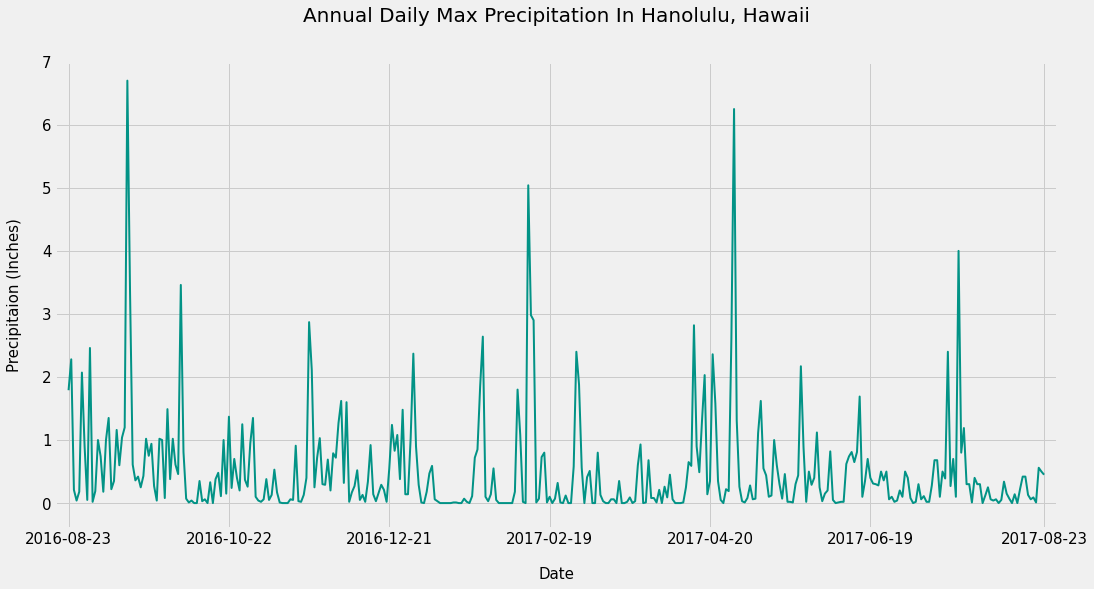

In [23]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.rcParams["figure.figsize"] = (16,8)
year_prcp_df.plot(linewidth = 2, alpha = 1, rot = 0,
                 xticks = (0, 60, 120, 180, 240, 300, 365),
                 color = "xkcd:teal")

plt.xlim(-5, 370)
plt.ylim(-0.4, 7)
plt.yticks(size = 15)
plt.xticks(fontsize = 15)
plt.legend('', frameon = False)
plt.xlabel("Date", fontsize = 15,color = "black",labelpad = 20)
plt.ylabel("Precipitaion (Inches)", fontsize = 15, color = "black", labelpad = 20)
plt.title("Annual Daily Max Precipitation In Hanolulu, Hawaii", fontsize = 20, pad = 40)

plt.show()

#### Summary Statistics 

In [36]:
# filter for one year
year_prcp_stats = (session.query(Measurement.date, Measurement.prcp)
                  .filter(Measurement.date > year_ago)
                  .all())
year_prcp_stats

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [37]:
# DataFrame, Drop NA
year_prcp_stats_df = pd.DataFrame(year_prcp_stats, columns = ["date", "prcp"])
year_prcp_stats_df
year_prcp_stats_df.dropna()

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2223,2017-08-17,0.13
2225,2017-08-19,0.09
2227,2017-08-21,0.56
2228,2017-08-22,0.50


In [38]:
# Use Pandas to calcualte the summary statistics for the precipitation data, use describe()
year_prcp_stats_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [39]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(Station).count()
print(f"Honolulu, Hawaii has {total_stations} stations.")

Honolulu, Hawaii has 9 stations.


In [40]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = (session.query(Measurement.station, func.count(Measurement.station))
                                .group_by(Measurement.station)
                                .order_by(func.count(Measurement.station).desc())
                                .all())

active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [57]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# tbos - temperature observation data
tobs  = [Measurement.station, 
        func.min(Measurement.tobs),
        func.max(Measurement.tobs),
        func.avg(Measurement.tobs)]

most_active_station = (session.query(*tobs)
                      .filter(Measurement.station == "USC00519281")
                      .all())

most_active_station

# DataFrame
most_active_station_temp = pd.DataFrame(most_active_station, columns = ["station", "min_temp", "max_temp", "avg_temp"])

most_active_station_temp.set_index("station", inplace=True)
most_active_station_temp

,min_temp,max_temp,avg_temp
station,,,
USC00519281,54.0,85.0,71.663781


In [73]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_tobs = (session.query(Measurement.date,(Measurement.tobs))
            .filter(func.strftime(Measurement.date) > year_ago)
            .filter(Measurement.station=="USC00519281")
            .all())

year_tobs

[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

In [81]:
# Plot Temperature Observations
# DataFrame
column_names = ["date", "tobs"]
tobs_df = pd.DataFrame(year_tobs, columns = column_names)
tobs_df

,date,tobs
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0
...,...,...
347,2017-08-14,77.0
348,2017-08-15,77.0
349,2017-08-16,76.0
350,2017-08-17,76.0


In [82]:
# Set Index as 'date'
tobs_df.set_index("date",inplace=True)

In [83]:
tobs_df

,tobs
date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
...,...
2017-08-14,77.0
2017-08-15,77.0
2017-08-16,76.0


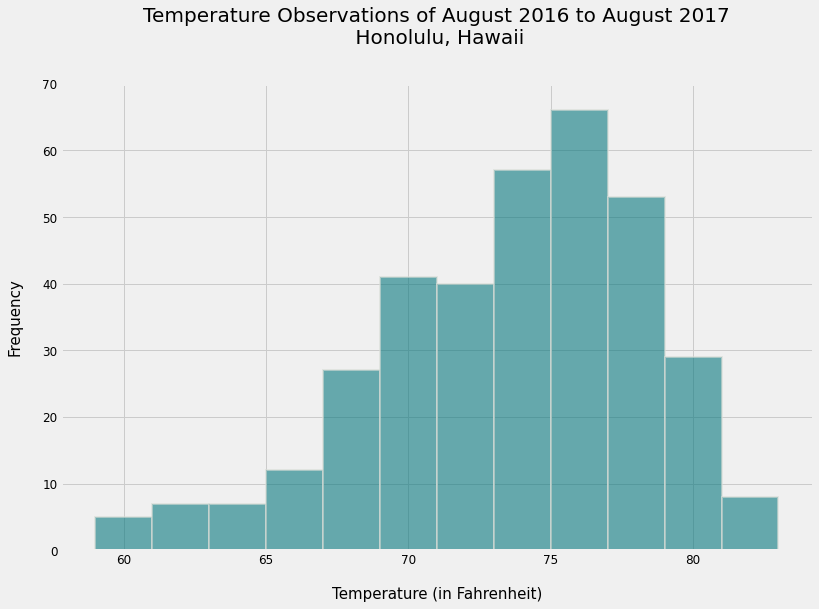

In [84]:

# Params
plt.rcParams["figure.figsize"] = (12,8)

# Plot Histogram
plt.hist(tobs_df['tobs'],bins=12,alpha=0.6,edgecolor='xkcd:light gray',
         linewidth=2,color='xkcd:deep aqua')

# Plot Title, Labels, Ticks, and Limits
plt.title("Temperature Observations of August 2016 to August 2017\n Honolulu, Hawaii", fontsize = 20, pad = 40)
plt.xlabel("Temperature (in Fahrenheit)", fontsize = 15, color = "black", labelpad = 20)
plt.ylabel("Frequency", fontsize = 15, color = "black", labelpad = 20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylim(0,70)

# Display Plot
plt.show()

# Close session

In [86]:
# Close Session
session.close()

# Step 2 - Climate App


In [13]:
# flask API, JSON
from flask import Flask, jsonify

In [14]:
app = Flask(__name__)

In [15]:
# Homepage - List all routes that are available.

@app.route("/")
def welcome():
    """List all routes that are available."""
    return (
        f"List all routes that are available:<br/>"
        f"/api/v1.0/precipitation<br/>"
        f"/api/v1.0/stations<br/>"
        f"/api/v1.0/tobs<br/>"
        f"/api/v1.0/<start><br/>"
        f"/api/v1.0/<start>/<end>"
    )

In [16]:
# Convert the query results to a dictionary using `date` as the key and `prcp` as the value.
# Return the JSON representation of your dictionary.

@app.route("/api/v1.0/precipitation")
def precipitation():
    # date
    maxDate = dt.date(2017, 8, 23)
    year_ago = maxDate - dt.timedelta(days=365)
    
    # prcp
    past_temp = (session.query(Measurement.date, Measurement.prcp)
                 .filter(Measurement.date <= maxDate)
                 .filter(Measurement.date >= year_ago)
                 .order_by(Measurement.date).all())
    precip = {date: prcp for date, prcp in past_temp}
    
    return jsonify(precip)

In [17]:
# Return a JSON list of stations from the dataset.

@app.route("/api/v1.0/stations")
def stations():
    
    stations_all = session.query(Station.station).all()
    
    return jsonify(stations_all)

In [18]:
# Query the dates and temperature observations of the most active station for the last year of data.

@app.route("/api/v1.0/tobs")
def tobs():
    maxDate = dt.date(2017, 8, 23)
    year_ago = maxDate - dt.timedelta(days=365)
    
    last_year = (session.query(Measurement.tobs)
                 .filter(Measurement.station == 'USC00519281')
                 .filter(Measurement.date <= maxDate)
                 .filter(Measurement.date >= year_ago).order_by(Measurement.tobs).all())
    
    return jsonify(last_year)
    

In [20]:
# Return a JSON list of the minimum temperature, the average temperature, and the max temperature for a given start or start-end range.
# When given the start only, calculate `TMIN`, `TAVG`, and `TMAX` for all dates greater than and equal to the start date.
@app.route("/api/v1.0/<start>")
def start(start = None):
    
    tobs_only = (session.query(Measurement.tobs)
                 .filter(Measurement.date.between(start, '2017-08-23')).all())
    
    tobs_df = pd.DataFrame(tobs_only)
    
    tavg = tobs_df["tobs"].mean()
    tmax = tobs_df["tobs"].max()
    tmin = tobs_df["tobs"].min()
    
    return jsonify(tavg, tmax, tmin)

In [21]:
# When given the start and the end date, calculate the `TMIN`, `TAVG`, and `TMAX` for dates between the start and end date inclusive.
@app.route("/api/v1.0/<start>/<end>")

def start_end(start = None, end = None):
    
    tobs_only = (session.query(Measurement.tobs).filter(Measurement.date.between(start, end)).all())
    
    tobs_df = pd.DataFrame(tobs_only)
    
    tavg = tobs_df["tobs"].mean()
    tmax = tobs_df["tobs"].max()
    tmin = tobs_df["tobs"].min()
    
    return jsonify(tavg, tmax, tmin)

In [22]:
if __name__ == '__main__':
    app.run(debug = True)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\chris\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3452: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
